In [2]:
# importing libraries
from urllib.request import urlopen as url #importing urllib for url request
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import urlopen
import re
import time

import pandas as pd #Importing the PANDAS python library
import numpy as np #importing Numpy
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #initiating VADER instance

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/randallgeszvain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
CUISINES = ['stone-creek-coffee-milwaukee-14','kickapoo-coffee-roasters-milwaukee-2',\
            'colectivo-lakefront-milwaukee','rochambo-coffee-and-tea-house-milwaukee',\
            'pilcrow-coffee-milwaukee-2','dryhootch-coffeehouse-milwaukee',\
            'colectivo-coffee-milwaukee-5','alderaan-coffee-milwaukee','interval-milwaukee',\
            'anodyne-coffee-roasting-milwaukee-5','grace-place-coffee-milwaukee','holey-moley-coffee-doughnuts-milwaukee',\
           'colectivo-coffee-us-bank-milwaukee','sojourner-mobile-coffee-milwaukee','coffeetails-milwaukee',\
           'milwaukee-coffee-peddlers-milwaukee-2','stone-creek-coffee-milwaukee-13','starbucks-milwaukee-42',\
           'brewed-cafe-milwaukee-3','anodyne-coffee-roasting-co-public-market-milwaukee']

biz=[]
aggregateRating=[]
priceRange=[]
streetAddress=[]
addressLocality=[]
addressRegion=[]
postalCode=[]
yelp=[]  

for name in CUISINES:
  
  for cp in np.arange(0,1):
  
    url = "http://www.yelp.com/biz/" + name + "?start=" + str(cp*20)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    metas_biz = soup.findAll("meta",{"itemprop":"name"})
    metas_aggregateRating = soup.find_all("meta",{"itemprop":"ratingValue"})
    metas_priceRange = soup.find_all("meta",{"itemprop":"priceRange"})
    
    biz.append(name)  
    aggregateRating.extend(i for i in [meta_aggregateRating.attrs['content'] for meta_aggregateRating in metas_aggregateRating[0:1] if 'itemprop' in meta_aggregateRating.attrs])
    priceRange.extend(i for i in [meta_priceRange.attrs['content'] for meta_priceRange in metas_priceRange if 'itemprop' in meta_priceRange.attrs])
    streetAddress.extend(i.text for i in soup.findAll("span",{"itemprop":"streetAddress"}))
    addressLocality.extend(i.text for i in soup.findAll("span",{"itemprop":"addressLocality"}))
    addressRegion.extend(i.text for i in soup.findAll("span",{"itemprop":"addressRegion"}))
    postalCode.extend(i.text for i in soup.findAll("span",{"itemprop":"postalCode"}))
    time.sleep(8)


biz = pd.DataFrame(biz)
aggregateRating = pd.DataFrame(aggregateRating)
priceRange = pd.DataFrame(priceRange)
streetAddress = pd.DataFrame(streetAddress)
addressLocality = pd.DataFrame(addressLocality)
addressRegion = pd.DataFrame(addressRegion)
postalCode = pd.DataFrame(postalCode)

yelp = pd.concat([biz, aggregateRating,  priceRange,  streetAddress, addressLocality, addressRegion, postalCode], axis=1, ignore_index=True)
yelp.columns = ['biz','aggregateRating','priceRange', 'streetAddress', 'addressLocality', 'addressRegion', 'postalCode']

export = yelp.to_csv("yelp" + ".csv")

In [ ]:
CUISINES = ['anodyne-coffee-roasting-co-public-market-milwaukee']

for name in CUISINES:

  date=[]
  author=[]
  #rating=[]
  review=[]
  yelp=[]  
  
  for cp in np.arange(0,10):
  
    url = "http://www.yelp.com/biz/" + name + "?start=" + str(cp*20)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    metas_author = soup.findAll("meta",{"itemprop":"author"})
    #metas_ratingValue = soup.find_all("meta",{"itemprop":"ratingValue"})
    metas_date = soup.find_all("meta",{"itemprop":"datePublished"})
    
    date.extend(i for i in [meta_date.attrs['content'] for meta_date in metas_date if 'itemprop' in meta_date.attrs])  
    author.extend(i for i in [meta_author.attrs['content'] for meta_author in metas_author if 'itemprop' in meta_author.attrs])
    #rating.extend(i for i in [meta_ratingValue.attrs['content'] for meta_ratingValue in metas_ratingValue[1:21] if 'itemprop' in meta_ratingValue.attrs])
    review.extend(i.text for i in soup.findAll("p",{"itemprop":"description"}))
    time.sleep(10)


  date = pd.DataFrame(date)
  author = pd.DataFrame(author)
  #rating = pd.DataFrame(rating)
  review = pd.DataFrame(review)

  yelp = pd.concat([date, author,  review], axis=1, ignore_index=True)
  yelp.columns = ['date','author','review']

  export = yelp.to_csv(name + ".csv")

In [92]:
stone_creek_coffee_milwaukee_14 = pd.read_csv('stone-creek-coffee-milwaukee-14.csv',index_col=0)
kickapoo_coffee_roasters_milwaukee_2 = pd.read_csv('kickapoo-coffee-roasters-milwaukee-2.csv',index_col=0)
colectivo_lakefront_milwaukee = pd.read_csv('colectivo-lakefront-milwaukee.csv',index_col=0)
rochambo_coffee_and_tea_house_milwaukee = pd.read_csv('rochambo-coffee-and-tea-house-milwaukee.csv',index_col=0)
pilcrow_coffee_milwaukee_2 = pd.read_csv('pilcrow-coffee-milwaukee-2.csv',index_col=0)
dryhootch_coffeehouse_milwaukee = pd.read_csv('dryhootch-coffeehouse-milwaukee.csv',index_col=0)
colectivo_coffee_milwaukee_5 = pd.read_csv('colectivo-coffee-milwaukee-5.csv',index_col=0)
alderaan_coffee_milwaukee = pd.read_csv('alderaan-coffee-milwaukee.csv',index_col=0)
interval_milwaukee = pd.read_csv('interval-milwaukee.csv',index_col=0)
anodyne_coffee_roasting_milwaukee_5 = pd.read_csv('anodyne-coffee-roasting-milwaukee-5.csv',index_col=0)
grace_place_coffee_milwaukee = pd.read_csv('grace-place-coffee-milwaukee.csv',index_col=0)
holey_moley_coffee_doughnuts_milwaukee = pd.read_csv('holey-moley-coffee-doughnuts-milwaukee.csv',index_col=0)
colectivo_coffee_us_bank_milwaukee = pd.read_csv('colectivo-coffee-us-bank-milwaukee.csv',index_col=0)
sojourner_mobile_coffee_milwaukee = pd.read_csv('sojourner-mobile-coffee-milwaukee.csv',index_col=0)
coffeetails_milwaukee = pd.read_csv('coffeetails-milwaukee.csv',index_col=0)
milwaukee_coffee_peddlers_milwaukee_2 = pd.read_csv('milwaukee-coffee-peddlers-milwaukee-2.csv',index_col=0)
stone_creek_coffee_milwaukee_13 = pd.read_csv('stone-creek-coffee-milwaukee-13.csv',index_col=0)

In [93]:
stone_creek_coffee_milwaukee_14['name'] = 'stone_creek_coffee_milwaukee_14'
kickapoo_coffee_roasters_milwaukee_2['name'] = 'colectivo_lakefront_milwaukee'
colectivo_lakefront_milwaukee['name'] = 'rochambo_coffee_and_tea_house_milwaukee'
rochambo_coffee_and_tea_house_milwaukee['name'] = 'rochambo_coffee_and_tea_house_milwaukee'
pilcrow_coffee_milwaukee_2['name'] = 'pilcrow_coffee_milwaukee_2'
dryhootch_coffeehouse_milwaukee['name'] = 'dryhootch_coffeehouse_milwaukee'
colectivo_coffee_milwaukee_5['name'] = 'colectivo_coffee_milwaukee_5'
alderaan_coffee_milwaukee['name'] = 'alderaan_coffee_milwaukee'
anodyne_coffee_roasting_milwaukee_5['name'] = 'anodyne_coffee_roasting_milwaukee_5'
grace_place_coffee_milwaukee['name'] = 'grace_place_coffee_milwaukee'
holey_moley_coffee_doughnuts_milwaukee['name'] = 'holey_moley_coffee_doughnuts_milwaukee'
colectivo_coffee_us_bank_milwaukee['name'] = 'colectivo_coffee_us_bank_milwaukee'
sojourner_mobile_coffee_milwaukee['name'] = 'sojourner_mobile_coffee_milwaukee'
coffeetails_milwaukee['name'] = 'coffeetails_milwaukee'
milwaukee_coffee_peddlers_milwaukee_2['name'] = 'milwaukee_coffee_peddlers_milwaukee_2'
stone_creek_coffee_milwaukee_13['name'] = 'stone_creek_coffee_milwaukee_13'

In [94]:
sentences = stone_creek_coffee_milwaukee_14.append([colectivo_lakefront_milwaukee, \
                                            rochambo_coffee_and_tea_house_milwaukee, \
                                            rochambo_coffee_and_tea_house_milwaukee, \
                                            pilcrow_coffee_milwaukee_2, \
                                            dryhootch_coffeehouse_milwaukee, \
                                            colectivo_coffee_milwaukee_5, \
                                            alderaan_coffee_milwaukee, \
                                            anodyne_coffee_roasting_milwaukee_5, \
                                            grace_place_coffee_milwaukee, \
                                            holey_moley_coffee_doughnuts_milwaukee, \
                                            colectivo_coffee_us_bank_milwaukee, \
                                            sojourner_mobile_coffee_milwaukee, \
                                            coffeetails_milwaukee, \
                                            milwaukee_coffee_peddlers_milwaukee_2, \
                                            stone_creek_coffee_milwaukee_13])

In [95]:
len(sentences)

1192

In [96]:
sentences = sentences.rename(columns={"review": "text"})

In [97]:
sentences.head()

,date,author,text,name
0,2019-04-09,Mike L.,What can I say that hasn't already been said.....,stone_creek_coffee_milwaukee_14
1,2019-07-23,Mary D.,My mom and I stopped here for coffee while on ...,stone_creek_coffee_milwaukee_14
2,2019-02-03,Staci C.,What an adorable and super spacious coffee sto...,stone_creek_coffee_milwaukee_14
3,2019-08-11,T P.,This location is a little hard to find with co...,stone_creek_coffee_milwaukee_14
4,2018-04-15,Jennifer R.,"After recently attending a ""coffee cupping,"" S...",stone_creek_coffee_milwaukee_14


In [98]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [99]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(sentences)):

    k = analyser.polarity_scores(sentences.iloc[i]['text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


1192

In [100]:
sentences['VADER score'] = compval1

In [101]:
sentences.dtypes

date            object
author          object
text            object
name            object
VADER score    float64
dtype: object

In [102]:
VADER_avg = sentences[['name','VADER score']]

In [103]:
VADER_avg = VADER_avg.groupby(['name']).mean()

In [104]:
VADER_avg = pd.DataFrame(VADER_avg)

In [105]:
VADER_avg['VADER score'] = round(((VADER_avg['VADER score']+1)/4)*10,1)

In [106]:
VADER_avg = VADER_avg.transpose()

In [107]:
VADER_avg

name,alderaan_coffee_milwaukee,anodyne_coffee_roasting_milwaukee_5,coffeetails_milwaukee,colectivo_coffee_milwaukee_5,colectivo_coffee_us_bank_milwaukee,dryhootch_coffeehouse_milwaukee,grace_place_coffee_milwaukee,holey_moley_coffee_doughnuts_milwaukee,milwaukee_coffee_peddlers_milwaukee_2,pilcrow_coffee_milwaukee_2,rochambo_coffee_and_tea_house_milwaukee,sojourner_mobile_coffee_milwaukee,stone_creek_coffee_milwaukee_13,stone_creek_coffee_milwaukee_14
VADER score,4.4,4.6,4.0,4.3,4.5,4.3,4.6,4.5,4.9,4.7,4.5,4.8,4.7,4.6


[Text(0, 0, 'alderaan_coffee_milwaukee'),
 Text(0, 0, 'anodyne_coffee_roasting_milwaukee_5'),
 Text(0, 0, 'coffeetails_milwaukee'),
 Text(0, 0, 'colectivo_coffee_milwaukee_5'),
 Text(0, 0, 'colectivo_coffee_us_bank_milwaukee'),
 Text(0, 0, 'dryhootch_coffeehouse_milwaukee'),
 Text(0, 0, 'grace_place_coffee_milwaukee'),
 Text(0, 0, 'holey_moley_coffee_doughnuts_milwaukee'),
 Text(0, 0, 'milwaukee_coffee_peddlers_milwaukee_2'),
 Text(0, 0, 'pilcrow_coffee_milwaukee_2'),
 Text(0, 0, 'rochambo_coffee_and_tea_house_milwaukee'),
 Text(0, 0, 'sojourner_mobile_coffee_milwaukee'),
 Text(0, 0, 'stone_creek_coffee_milwaukee_13'),
 Text(0, 0, 'stone_creek_coffee_milwaukee_14')]

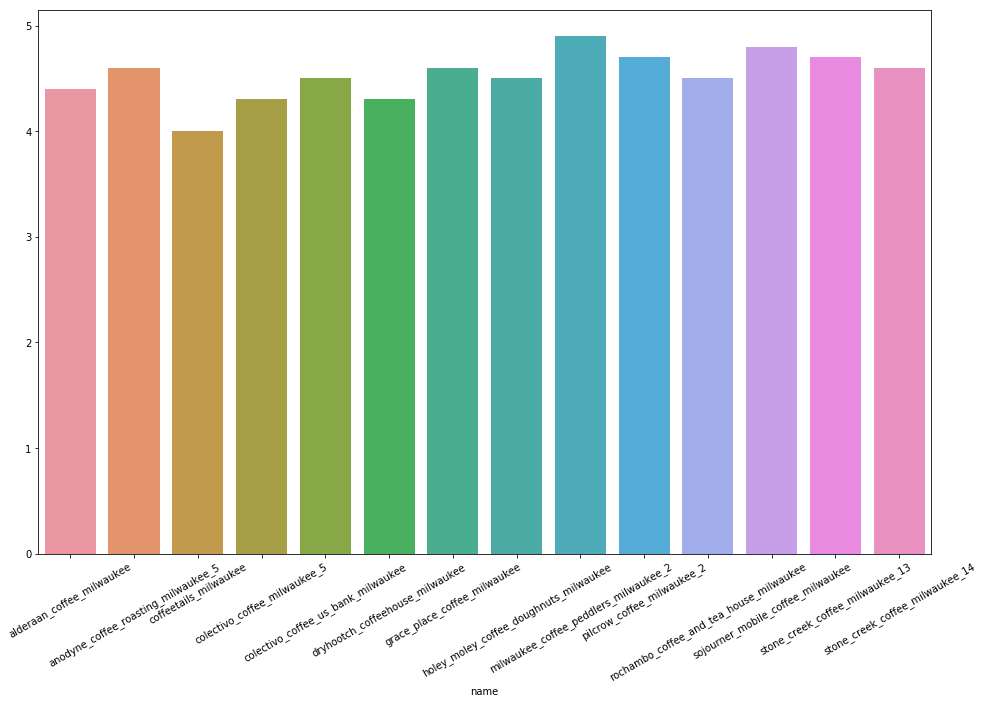

In [108]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(data=VADER_avg)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [109]:
sentences = pd.DataFrame(sentences)

In [110]:
vader = sentences.set_index('date')

In [111]:
vader_lavender = vader[vader['text'].str.contains("lavender")]

In [112]:
vader_lavender_score = vader_lavender[["name","VADER score"]]

In [113]:
indexNames = vader_lavender_score[ vader_lavender_score['name'] == 'holey_moley_coffee_doughnuts_milwaukee' ].index
 
# Delete these row indexes from dataFrame
vader_lavender_score.drop(indexNames , inplace=True)

In [114]:
vader_lavender_score['VADER score'] = round(((vader_lavender_score['VADER score']+1)/4)*10,1)

/Users/randallgeszvain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/randallgeszvain/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


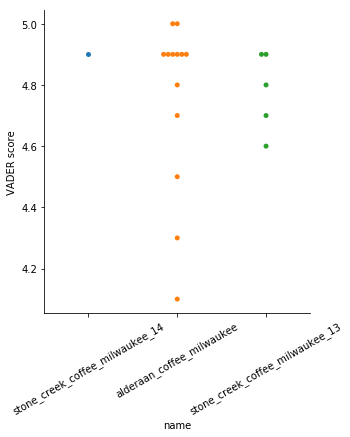

In [115]:
# Factor Plot
g = sns.factorplot(x='name', 
                   y='VADER score', 
                   data=vader_lavender_score, 
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=30)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

In [116]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

In [118]:
indexNames = vader_lavender[ vader_lavender['name'] == 'holey_moley_coffee_doughnuts_milwaukee' ].index
 
# Delete these row indexes from dataFrame
vader_lavender.drop(indexNames , inplace=True)

In [121]:
df = vader_lavender[['text']]

In [122]:
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("amp")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

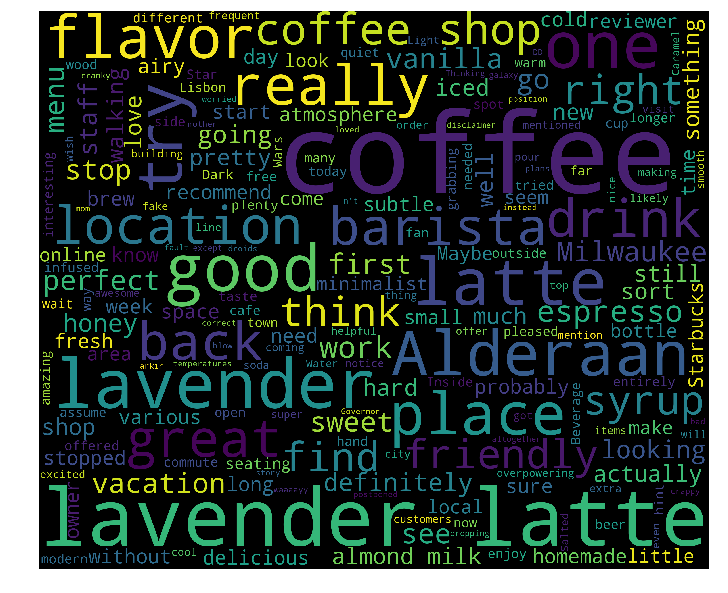

In [123]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()